In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

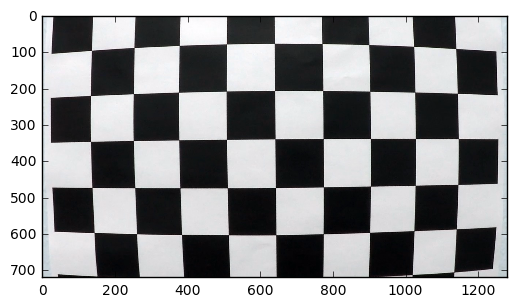

In [2]:
# Make a list of calibration images
fname = 'camera_cal/calibration1.jpg'
img = cv2.imread(fname)
plt.imshow(img)
plt.show()

In [3]:
# Make a list of calibration images
fname = 'camera_cal/calibration1.jpg'
img = cv2.imread(fname)

# prepare object points
nx = 9
ny = 6

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)
    plt.show()

In [4]:
objpoints = []
imgpoints = []

objp       = np.zeros((nx * ny, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

images = glob.glob('camera_cal/calibration*.jpg')

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        print(fname)
        imgpoints.append(corners)
        objpoints.append(objp)
        img2 = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        write_name = 'camera_cal/corners_found'+str(idx)+'.jpg'
        cv2.imwrite(write_name, img2)

camera_cal\calibration10.jpg
camera_cal\calibration11.jpg
camera_cal\calibration12.jpg
camera_cal\calibration13.jpg
camera_cal\calibration14.jpg
camera_cal\calibration15.jpg
camera_cal\calibration16.jpg
camera_cal\calibration17.jpg
camera_cal\calibration18.jpg
camera_cal\calibration19.jpg
camera_cal\calibration2.jpg
camera_cal\calibration20.jpg
camera_cal\calibration3.jpg
camera_cal\calibration6.jpg
camera_cal\calibration7.jpg
camera_cal\calibration8.jpg
camera_cal\calibration9.jpg


In [5]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

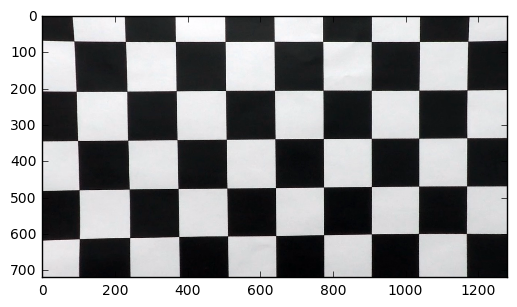

In [6]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(undist)
plt.show()

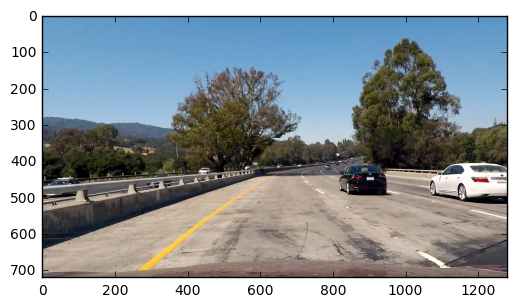

In [7]:
img = cv2.imread('test_images/test1.jpg')
img_size = (img.shape[1], img.shape[0])
undist  = cv2.undistort(img, mtx, dist, None, mtx)
undist  = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
plt.imshow(undist)
plt.show()

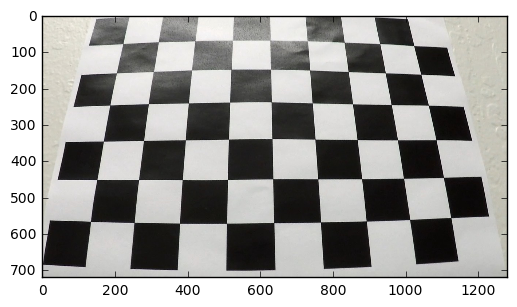

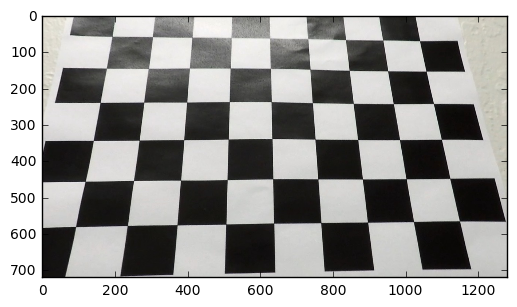

In [8]:
img = cv2.imread('camera_cal/calibration3.jpg')
img_size = (img.shape[1], img.shape[0])
undist   = cv2.undistort(img, mtx, dist, None, mtx)
img      = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
undist   = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
plt.imshow(undist)
plt.show()

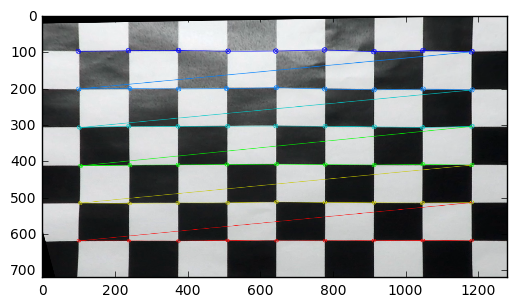

In [9]:
# Make a list of calibration images
fname  = 'camera_cal/calibration3.jpg'
img    = cv2.imread(fname)
undist = cv2.undistort(img, mtx, dist, None, mtx)
gray   = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
    offset = 100
    img_size = (gray.shape[1], gray.shape[0])
    src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
    dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(undist, M, img_size)
    plt.imshow(warped)
    plt.show()

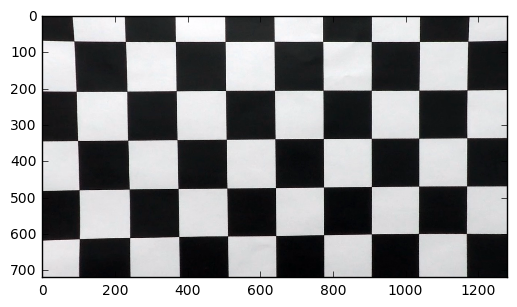

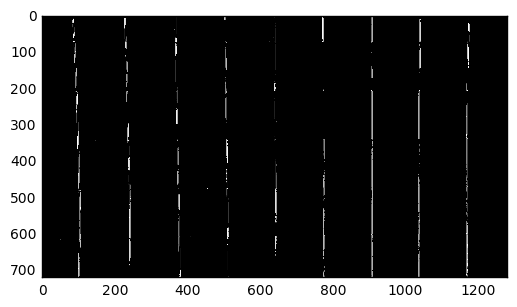

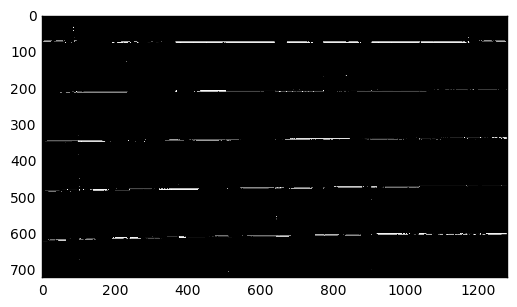

In [10]:
fname  = 'camera_cal/calibration1.jpg'
img    = cv2.imread(fname)
undist = cv2.undistort(img, mtx, dist, None, mtx)
gray   = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
plt.imshow(undist)
plt.show()

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
abs_sobelx = np.absolute(sobelx)
abs_sobely = np.absolute(sobely)
scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))

thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobelx)
sxbinary[(scaled_sobelx >= thresh_min) & (scaled_sobelx <= thresh_max)] = 1
sybinary = np.zeros_like(scaled_sobely)
sybinary[(scaled_sobely >= thresh_min) & (scaled_sobely <= thresh_max)] = 1

plt.imshow(sxbinary, cmap='gray')
plt.show()
plt.imshow(sybinary, cmap='gray')
plt.show()

In [11]:
def colorSpaceR(image):
    return image[:,:,2]
    
def colorSpaceS(image):
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    S   = hls[:,:,2]
    return S

def colorSpaceY(image):
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    Y   = yuv[:,:,0]
    return Y

def colorSpaceG(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [12]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255), color='r'):
    if color == 'r':
        gray = colorSpaceR(img)
    if color == 's':
        gray = colorSpaceS(img)
    if color == 'y':
        gray = colorSpaceY(img)
    if color == 'g':
        gray = colorSpaceG(img)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_output

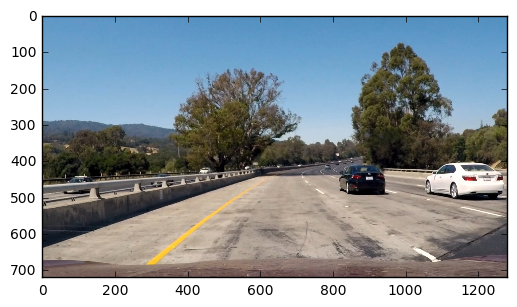

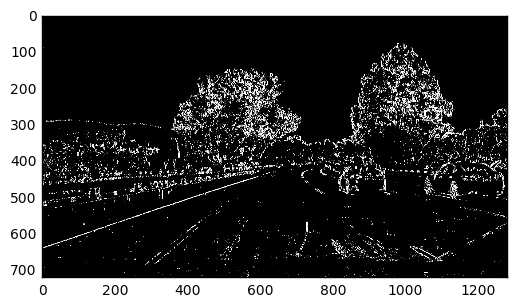

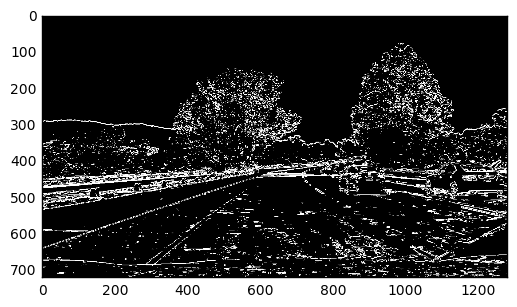

In [13]:
image = cv2.imread('test_images/test1.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
grad_binaryx = abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(20, 100))
grad_binaryy = abs_sobel_thresh(image, orient='y', sobel_kernel=3, thresh=(20, 100))
plt.imshow(grad_binaryx, cmap='gray')
plt.show()
plt.imshow(grad_binaryy, cmap='gray')
plt.show()

In [14]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255), color='r'):
    if color == 'r':
        gray = colorSpaceR(img)
    if color == 's':
        gray = colorSpaceS(img)
    if color == 'y':
        gray = colorSpaceY(img)
    if color == 'g':
        gray = colorSpaceG(img)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    return binary_output

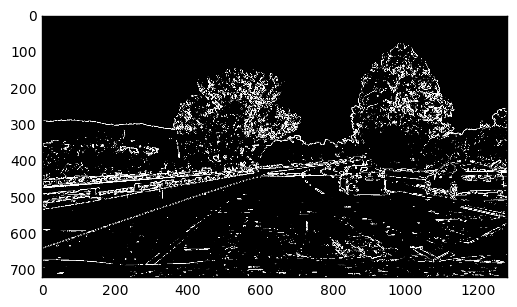

In [15]:
image = cv2.imread('test_images/test1.jpg')
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
plt.imshow(mag_binary, cmap='gray')
plt.show()

In [16]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2), color='r'):
    if color == 'r':
        gray = colorSpaceR(img)
    if color == 's':
        gray = colorSpaceS(img)
    if color == 'y':
        gray = colorSpaceY(img)
    if color == 'g':
        gray = colorSpaceG(img)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[ ( (absgraddir >= thresh[0] - np.pi/8) & (absgraddir <= thresh[0] + np.pi/8) ) |
                   ( (absgraddir >= thresh[0] - np.pi/8) & (absgraddir <= thresh[0] + np.pi/8) ) ] = 1
    return binary_output

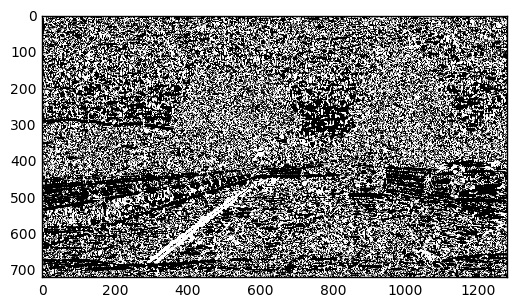

In [18]:
image = cv2.imread('test_images/test1.jpg')
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.78, 2.35))
plt.imshow(dir_binary, cmap='gray')
plt.show()

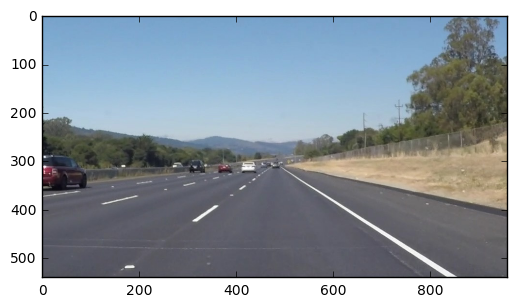

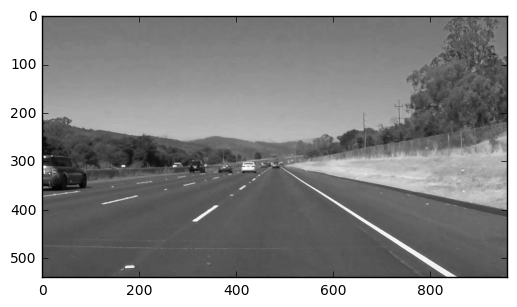

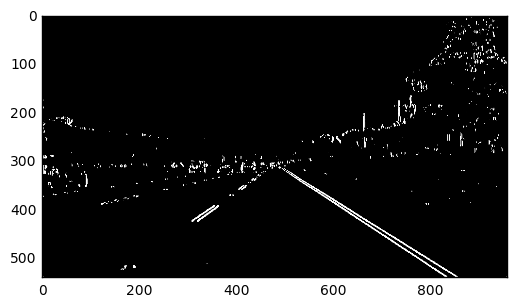

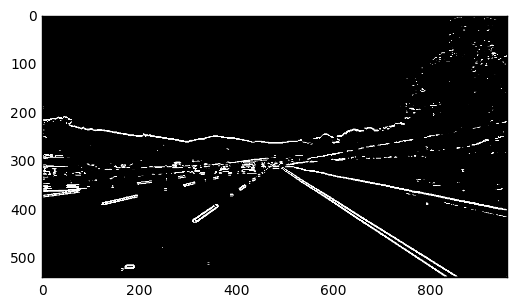

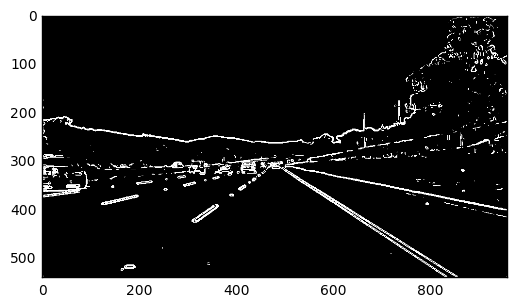

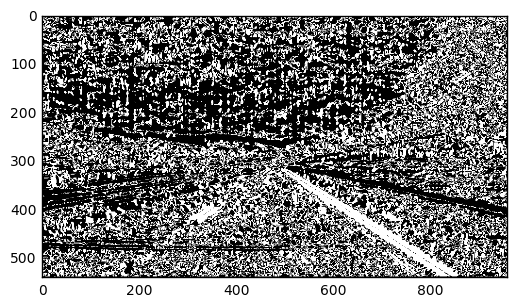

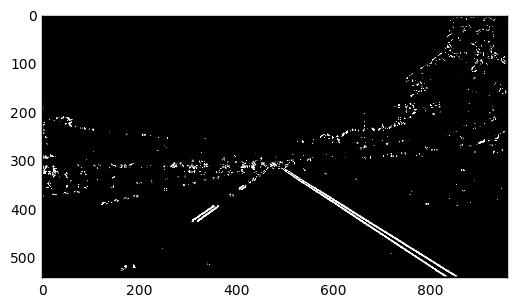

In [19]:
image = cv2.imread('test_images/solidWhiteRight.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(colorSpaceR(image), cmap='gray')
plt.show()

ksize = 5
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(40, 200))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(40, 200))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(40, 200))
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.78, 2.35))

plt.imshow(gradx, cmap='gray')
plt.show()
plt.imshow(grady, cmap='gray')
plt.show()
plt.imshow(mag_binary, cmap='gray')
plt.show()
plt.imshow(dir_binary, cmap='gray')
plt.show()

combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

plt.imshow(combined, cmap='gray')
plt.show()

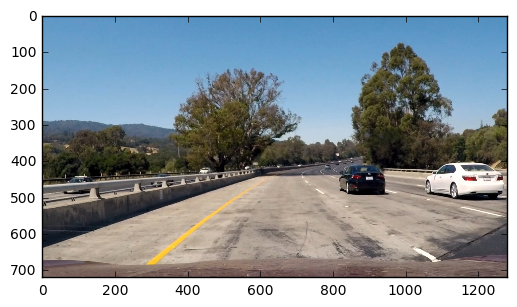

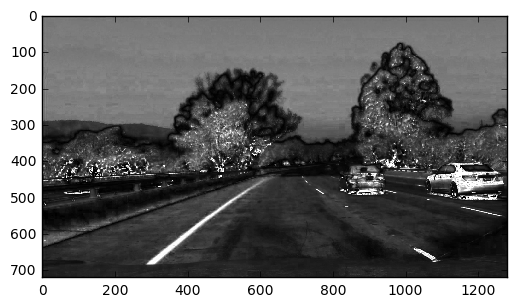

In [20]:
image = cv2.imread('test_images/test1.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

plt.imshow(S, cmap='gray')
plt.show()

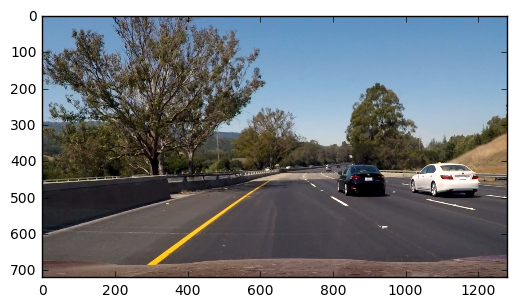

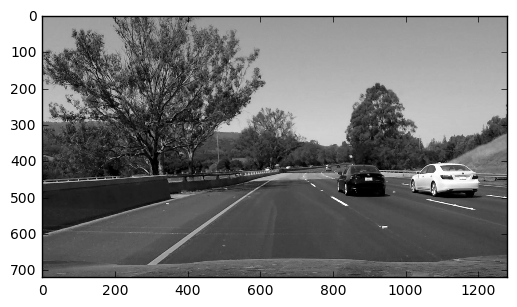

In [21]:
image = cv2.imread('test_images/test6.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
Y = yuv[:,:,0]
U = yuv[:,:,1]
V = yuv[:,:,2]

plt.imshow(Y, cmap='gray')
plt.show()

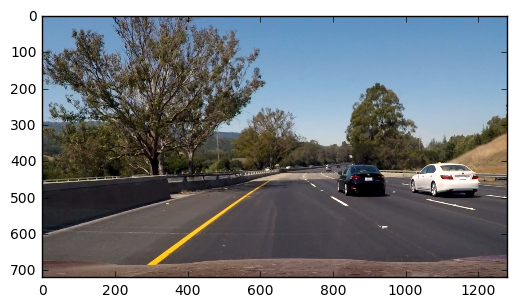

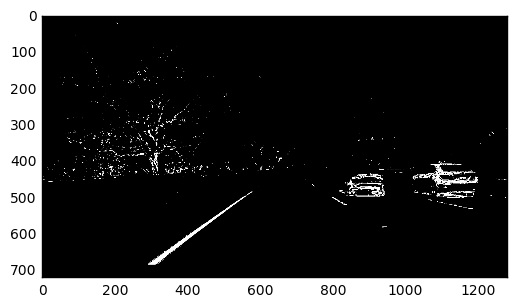

In [22]:
image = cv2.imread('test_images/test6.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    H = hls[:,:,0]
    L = hls[:,:,1]
    S = hls[:,:,2]
    binary_output =  np.zeros_like(S)
    binary_output[(S >= thresh[0]) & (S <= thresh[1])] = 1
    return binary_output

hls_binary = hls_select(image, thresh=(200, 255))
plt.imshow(hls_binary, cmap='gray')
plt.show()

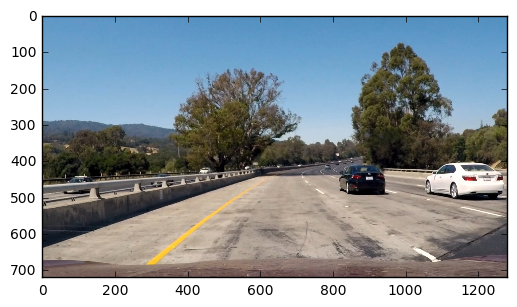

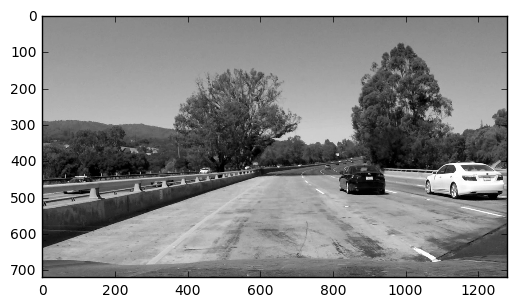

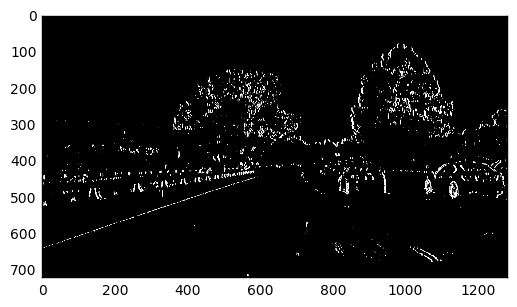

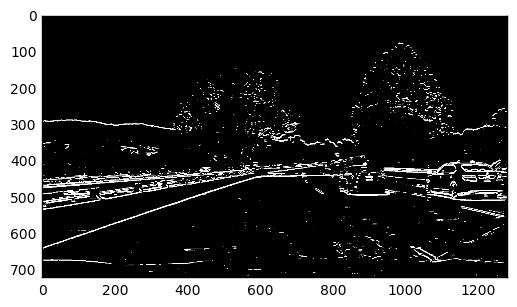

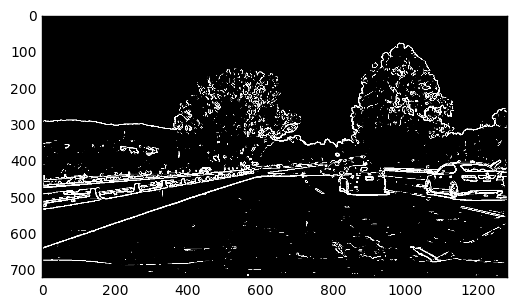

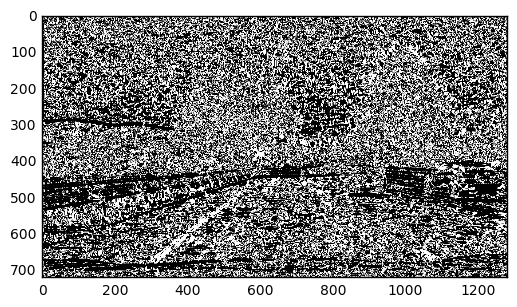

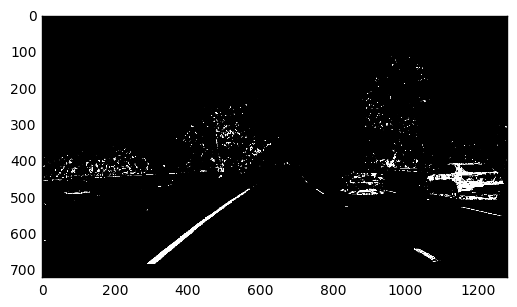

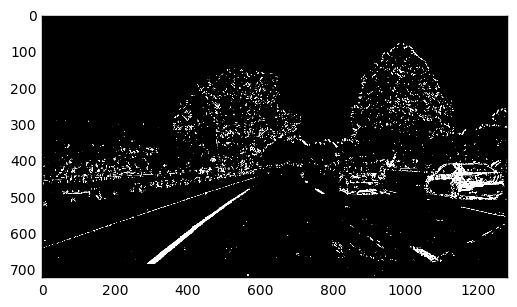

In [23]:
image = cv2.imread('test_images/test1.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(colorSpaceG(image), cmap='gray')
plt.show()

ksize = 7
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(40, 200), color = 'g')
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(40, 200), color = 'g')
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(40, 200), color = 'g')
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.78, 2.35), color = 'g')
hls_binary = hls_select(image, thresh=(170, 255))

plt.imshow(gradx, cmap='gray')
plt.show()
plt.imshow(grady, cmap='gray')
plt.show()
plt.imshow(mag_binary, cmap='gray')
plt.show()
plt.imshow(dir_binary, cmap='gray')
plt.show()
plt.imshow(hls_binary, cmap='gray')
plt.show()

combined = np.zeros_like(dir_binary)
combined[(hls_binary == 1) | ((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

plt.imshow(combined, cmap='gray')
plt.show()


In [24]:
def pipeline(img, s_thresh=(170, 250), sx_thresh=(40, 100), colorspace='g'):
    
    # undistort image
    image = cv2.undistort(img, mtx, dist, None, mtx)
    
    ksize = 3
    
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=sx_thresh, color=colorspace)
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=sx_thresh, color=colorspace)
    mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=sx_thresh, color=colorspace)
    dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.78, 2.35), color=colorspace)
    hls_binary = hls_select(image, thresh=s_thresh)
    
    combined = np.zeros_like(dir_binary)
    combined[(hls_binary == 1) | ((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    
    return combined

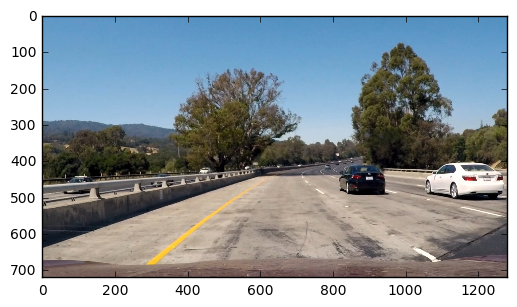

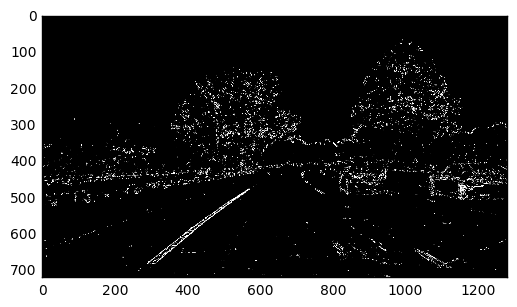

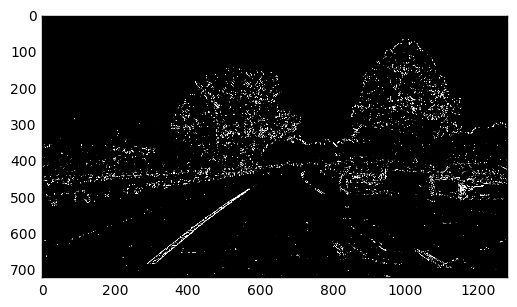

In [25]:
image = cv2.imread('test_images/test1.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(pipeline(image, colorspace='r'), cmap='gray')
plt.show()
plt.imshow(pipeline(image, colorspace='g'), cmap='gray')
plt.show()

In [94]:
def metaPipeline(image):
    
    img_size = (image.shape[1], image.shape[0])
    offset = 200
    
    src = np.float32([[img_size[0] * 0.47, img_size[1] * 0.63], 
                      [img_size[0] * 0.53, img_size[1] * 0.63], 
                      [img_size[0],   img_size[1]], 
                      [0,             img_size[1]]])
    
    dst = np.float32([[offset, 0], 
                      [img_size[0] - offset, 0], 
                      [img_size[0] - offset, img_size[1]], 
                      [offset, img_size[1]]])
    
    M = cv2.getPerspectiveTransform(src, dst)
                       
    warped = cv2.warpPerspective(image, M, img_size)
                       
    return warped

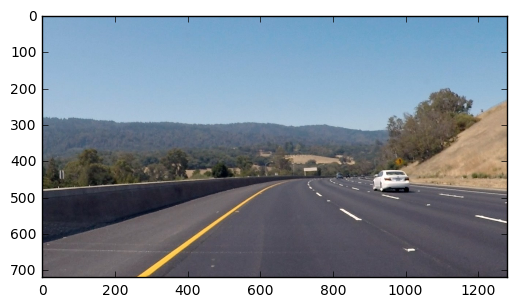

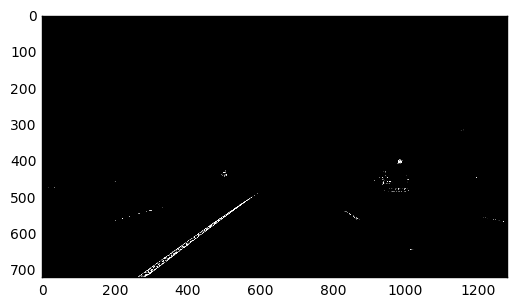

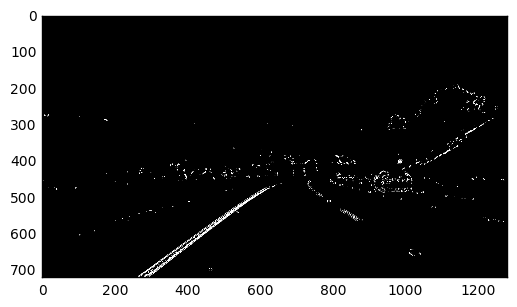

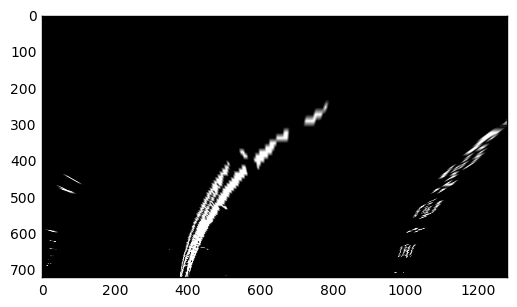

In [95]:
image = cv2.imread('test_images/test3.jpg')

# original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow( hls_select(image, thresh=(170,254)), cmap='gray')
plt.show()

# get lines
procimg = pipeline(image, colorspace='r')
plt.imshow(procimg, cmap = 'gray')
plt.show()

# and warp them
undst = metaPipeline(procimg)
plt.imshow(undst, cmap = 'gray')
plt.show()

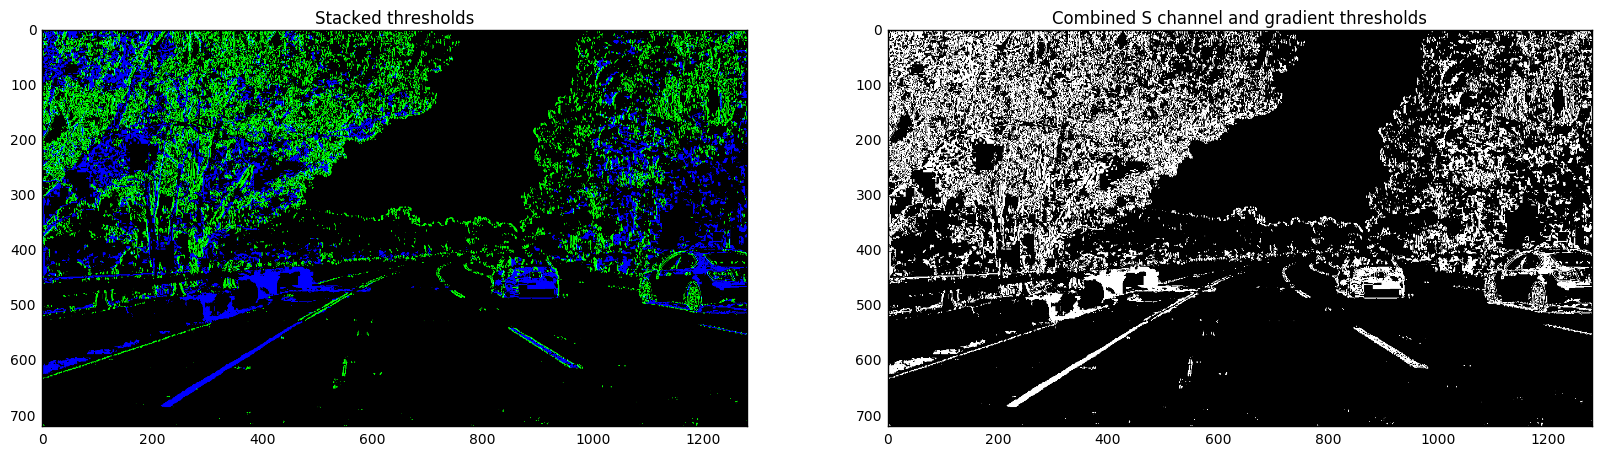

In [76]:
img = cv2.imread('test_images/test5.jpg')

hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
s_channel = hls[:,:,2]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) 
abs_sobelx = np.absolute(sobelx)
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

thresh_min = 20
thresh_max = 100
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))

combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(255 * color_binary)
ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')
plt.show()

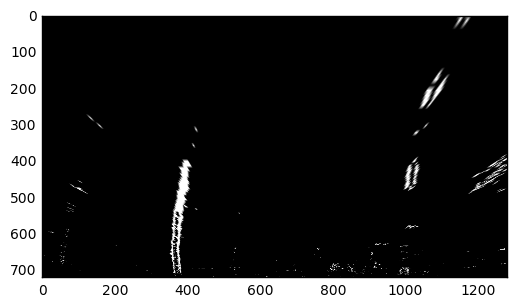

In [29]:
image = cv2.imread('test_images/test1.jpg')
procimg = pipeline(image, colorspace='r')
undst = metaPipeline(procimg)
plt.imshow(undst, cmap = 'gray')
plt.show()

C:\Users\uidp7273\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


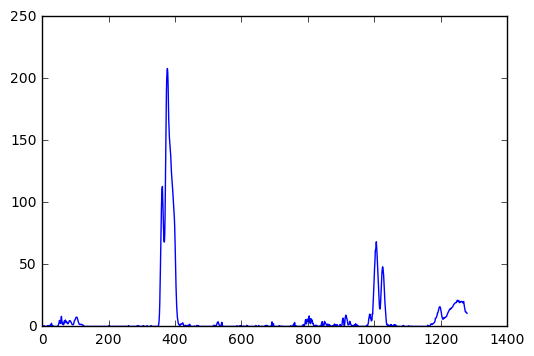

In [30]:
histogram = np.sum(undst[undst.shape[0]/2:,:], axis=0)
plt.plot(histogram)
plt.show()

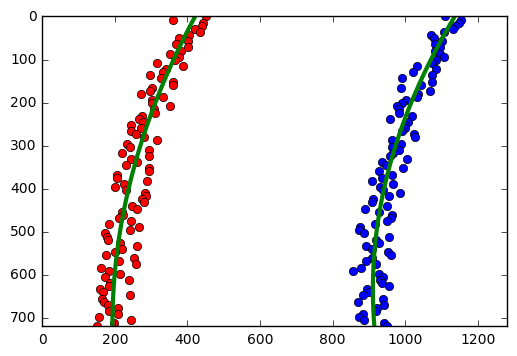

In [69]:
import numpy as np
yvals = np.linspace(0, 100, num=101)*7.2

leftx = np.array([200 + (elem**2)*4e-4 + np.random.randint(-50, high=51) 
                              for idx, elem in enumerate(yvals)])
leftx = leftx[::-1]

rightx = np.array([900 + (elem**2)*4e-4 + np.random.randint(-50, high=51) 
                                for idx, elem in enumerate(yvals)])
rightx = rightx[::-1]

# Fit a second order polynomial to each fake lane line
left_fit = np.polyfit(yvals, leftx, 2)
left_fitx = left_fit[0]*yvals**2 + left_fit[1]*yvals + left_fit[2]
right_fit = np.polyfit(yvals, rightx, 2)
right_fitx = right_fit[0]*yvals**2 + right_fit[1]*yvals + right_fit[2]

# Plot up the fake data
plt.plot(leftx, yvals, 'o', color='red')
plt.plot(rightx, yvals, 'o', color='blue')
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, yvals, color='green', linewidth=3)
plt.plot(right_fitx, yvals, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images
plt.show()

In [70]:
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(yvals)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) \
                             /np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) \
                                /np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)
# Example values: 1163.9    1213.7

1130.09132649 904.221712702


In [71]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meteres per pixel in x dimension

left_fit_cr = np.polyfit(yvals*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(yvals*ym_per_pix, rightx*xm_per_pix, 2)
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval + left_fit_cr[1])**2)**1.5) \
                             /np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval + right_fit_cr[1])**2)**1.5) \
                                /np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 3380.7 m    3189.3 m

3492.40278265 m 4974.50056476 m
